## Getting data via yfinance

How to download OHLCV data from yfinance

In [2]:
import yfinance as yf

# get ohlcv data for any ticker by period.
data_1mo_5min = yf.download("MSFT", period='1mo', interval="5m")

# get ohlcv data for any ticker by start date and end date
data_date_range = yf.download("MSFT", start="2017-01-01", end="2020-04-24")

# get intraday data for any ticker by period.
data_1mo_1d = yf.download("MSFT", period='1mo', interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
type(data_1mo_5min)

pandas.core.frame.DataFrame

Getting data for multiple tickers


In [4]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]

start = dt.datetime.today()-dt.timedelta(360)
end = dt.datetime.today()

cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
cl_price["INFY.NS"].head()

Date
2022-02-10            NaN
2022-02-11    1684.897705
2022-02-14    1646.576660
2022-02-15    1701.439697
2022-02-16    1696.594727
Name: INFY.NS, dtype: float64

In [6]:
ohlcv_data.keys()

dict_keys(['AMZN', 'MSFT', 'INTC', 'GOOG', 'INFY.NS', '3988.HK'])

In [7]:
ohlcv_data["INFY.NS"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-11,1740.000000,1745.949951,1713.000000,1721.349976,1684.897583,7551371
2022-02-14,1690.000000,1718.550049,1678.250000,1682.199951,1646.576660,7459637
2022-02-15,1699.000000,1746.750000,1690.449951,1738.250000,1701.439697,4669915
2022-02-16,1738.250000,1755.449951,1726.849976,1733.300049,1696.594604,5350642
2022-02-17,1744.000000,1749.000000,1720.300049,1724.800049,1688.274658,3937950
...,...,...,...,...,...,...
2023-01-30,1528.800049,1544.000000,1520.000000,1538.800049,1538.800049,6964719
2023-01-31,1548.900024,1548.900024,1513.000000,1533.750000,1533.750000,9448126
2023-02-01,1542.199951,1555.050049,1528.050049,1551.099976,1551.099976,6194199


As long as the `yfinance` library is up and running, we wouldn't need the following code. However, it's better to be safe than sorry. Thus, the following code block demonstrates different libraries that would get our job done, for getting the data for a specific ticker. 

Getting data via different package `yahoofinancials`

In [8]:
from yahoofinancials import YahooFinancials

ticker = 'MSFT'
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2018-04-24", "2020-04-24", "daily")


In [9]:
data.keys()

dict_keys(['MSFT'])

In [10]:
(data["MSFT"]["prices"])[:2]

[{'date': 1524576600,
  'high': 96.47000122070312,
  'low': 92.41000366210938,
  'open': 96.23999786376953,
  'close': 93.12000274658203,
  'volume': 34524800,
  'adjclose': 88.10443115234375,
  'formatted_date': '2018-04-24'},
 {'date': 1524663000,
  'high': 93.30000305175781,
  'low': 90.27999877929688,
  'open': 93.30000305175781,
  'close': 92.30999755859375,
  'volume': 33729300,
  'adjclose': 87.33804321289062,
  'formatted_date': '2018-04-25'}]

`yahoo_financials` give data in the form of json unlike yfiance which gives us the data in the form of a dataframe

In [11]:
import pandas as pd
from yahoofinancials import YahooFinancials
import datetime as dt

all_tickers = ["AAPL","MSFT","CSCO","AMZN","INTC"]

# extracting stock data (historical close price) for the stocks identified
close_prices = pd.DataFrame()
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')
for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[["formatted_date","adjclose"]]
    temp.set_index("formatted_date",inplace=True)
    temp.dropna(inplace=True)
    close_prices[ticker] = temp["adjclose"]
    
    
# extracting stock data (ohlcv) for the stocks identified
ohlv_dict = {}
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')
for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[["formatted_date","adjclose","open","low","high","volume"]]
    temp.set_index("formatted_date",inplace=True)
    temp.dropna(inplace=True)
    ohlv_dict[ticker] = temp

In [12]:
ohlv_dict.keys()

dict_keys(['AAPL', 'MSFT', 'CSCO', 'AMZN', 'INTC'])

In [13]:
ohlv_dict["AMZN"]

,adjclose,open,low,high,volume
formatted_date,,,,,
2018-02-06,72.141998,68.072998,67.589500,72.199501,221336000
2018-02-07,70.838997,72.449997,70.757500,73.049500,143254000
2018-02-08,67.525002,71.484001,67.497002,71.687500,171572000
2018-02-09,66.980003,68.674500,63.296501,69.175003,282830000
2018-02-12,69.311501,68.233498,67.200500,69.690498,134778000
...,...,...,...,...,...
2023-01-30,100.550003,101.089996,99.010002,101.739998,70691900
2023-01-31,103.129997,101.160004,101.139999,103.349998,66527300
2023-02-01,105.150002,102.529999,101.239998,106.239998,80450100


## OHLCV data and perform basic data operations

In [14]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

#familiarizing with data
cl_price.head(8) #prints the first 8 rows of the dataframe
cl_price.tail() #prints the last 5 rows of the dataframe
cl_price.describe() #performs summary statistic of each numerical columns in the datafrme

# Mean, Median, Standard Deviation
cl_price.mean() #calculates mean stock price for each stock
cl_price.median() #calculates median stock price for each stock
cl_price.std() #calculates standard deviation of stock price for each stock

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return = cl_price/cl_price.shift(1) - 1 #Performs same operation as above

daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN       0.021182
MSFT       0.017589
BHEL.NS    0.028836
GOOG       0.017576
dtype: float64

In [15]:
daily_return["BHEL.NS"].tail(20) * 100

Date
2023-01-05    3.472222
2023-01-06   -0.244048
2023-01-09   -0.366976
2023-01-10   -1.964394
2023-01-11    1.440202
2023-01-12   -1.234568
2023-01-13    0.874996
2023-01-17   -1.115234
2023-01-18    1.378444
2023-01-19   -1.112486
2023-01-20    1.000004
2023-01-23   -0.742582
2023-01-24   -2.057349
2023-01-25   -2.355195
2023-01-27   -4.498041
2023-01-30    1.092154
2023-01-31    5.874407
2023-02-01   -3.571432
2023-02-02    0.000000
2023-02-03   -0.859790
Name: BHEL.NS, dtype: float64

## OHLCV data and perform rolling operations

In [16]:

import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

# Rolling operations (simple)
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max()
daily_return.rolling(window=10).sum()

# Rolling operations (exponentialy weighted)
daily_return.ewm(com=10, min_periods=10).mean()
daily_return.ewm(com=10, min_periods=10).std()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,MSFT,BHEL.NS,GOOG
Date,,,,
2013-02-08,NaN,NaN,NaN,NaN
2013-02-11,NaN,NaN,NaN,NaN
2013-02-12,NaN,NaN,NaN,NaN
2013-02-13,NaN,NaN,NaN,NaN
2013-02-14,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-01-30,0.026341,0.020403,0.022282,0.026071
2023-01-31,0.025710,0.020272,0.028543,0.025287
2023-02-01,0.024723,0.019933,0.029169,0.024301


In [17]:
daily_return["BHEL.NS"].ewm(com=10, min_periods=10).mean().tail(20) * 100

Date
2023-01-05    0.246825
2023-01-06    0.202200
2023-01-09    0.150457
2023-01-10   -0.041803
2023-01-11    0.092925
2023-01-12   -0.027756
2023-01-13    0.054312
2023-01-17   -0.052010
2023-01-18    0.078031
2023-01-19   -0.030198
2023-01-20    0.063457
2023-01-23   -0.009819
2023-01-24   -0.195958
2023-01-25   -0.392253
2023-01-27   -0.765506
2023-01-30   -0.596628
2023-01-31   -0.008352
2023-02-01   -0.332268
2023-02-02   -0.302062
2023-02-03   -0.352765
Name: BHEL.NS, dtype: float64

## Import OHLCV data and perform basic visualizations

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Stock Price Evolution'}, xlabel='Date'>

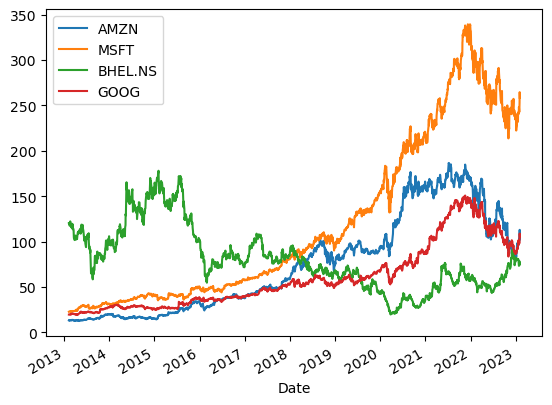

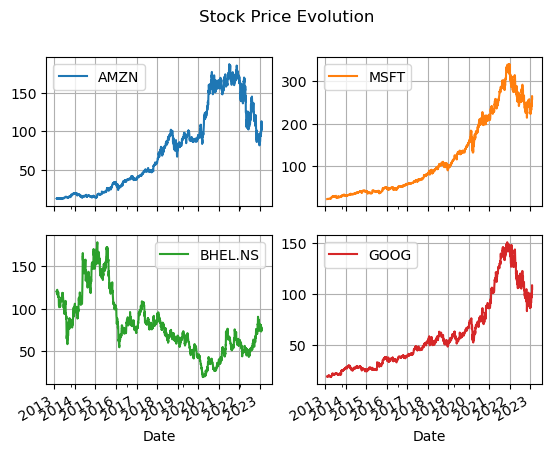

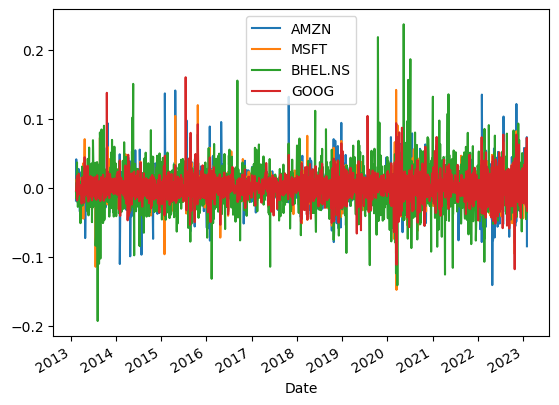

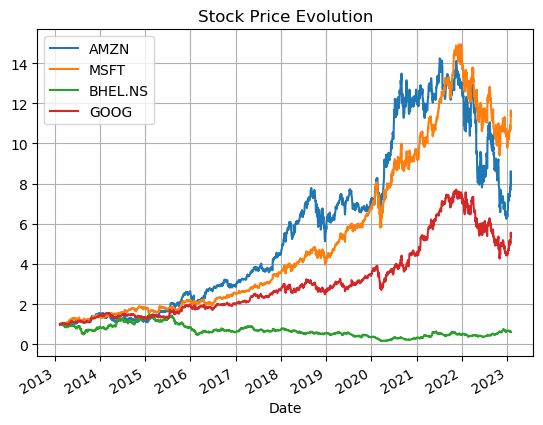

In [18]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
  
#plotting close prices
cl_price.plot() 
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks
  
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)    
# cumprod is what we call running product in our leetcode problems 
    
    
    
    
    
    

## Import OHLCV data and perform visualizations using pyplot module

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<BarContainer object of 4 artists>

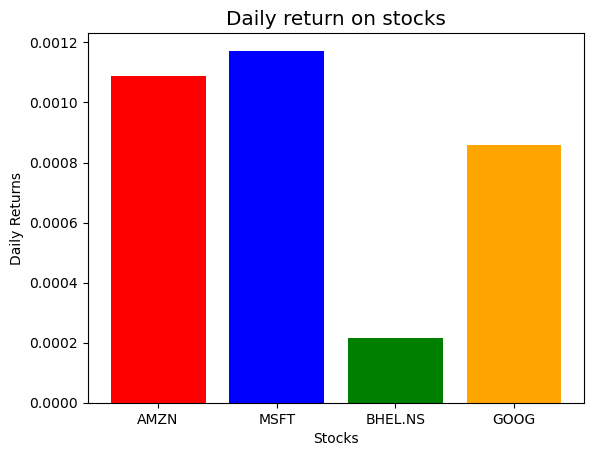

In [19]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
 
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"]) 
